<a href="https://colab.research.google.com/github/akashgardas/digits-classification-model/blob/main/model/Digits_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- mlxtend lib for reading IDX files from MINST data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('drive/MyDrive/Machine Learning/MLdata/digits_classification_model_data')

['t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte']

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.data import loadlocal_mnist

In [ ]:
# paths
images = 'drive/MyDrive/Machine Learning/MLdata/digits_classification_model_data/t10k-images.idx3-ubyte'
labels = 'drive/MyDrive/Machine Learning/MLdata/digits_classification_model_data/t10k-labels.idx1-ubyte'

In [ ]:
# load the data
x, y = loadlocal_mnist(images, labels)

In [ ]:
x, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
# dimensions
# x - images
# y - labels
print(x.shape, y.shape)
print(f'X rows: {x.shape[0]}')
print(f'X columns: {x.shape[1]}')
print(f'Y rows: {y.shape[0]}')

(10000, 784) (10000,)
X rows: 10000
X columns: 784
Y rows: 10000


## Data preprocessing



### a. Reshaping
data is already flattened

### b. Normalize the data

In [ ]:
print(f"Original data: {x[0]}")

Original data: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198

In [ ]:
x.ndim

2

In [ ]:
# normalizaton to range 0-1
x_normalized = x / 255.0
print(f'Normalized data: \n{x_normalized[0]}')

Normalized data: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.  

# Divide the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X train: {x_train.shape}')
print(f'X test: {x_test.shape}')
print(f'Y train: {y_train.shape}')
print(f'Y test: {y_test.shape}')

X train: (8000, 784)
X test: (2000, 784)
Y train: (8000,)
Y test: (2000,)


## Model choosing and training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# training the logistic regression model for probability
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Testing

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 90.75%


## Prediction on New Random Image

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from random import randint

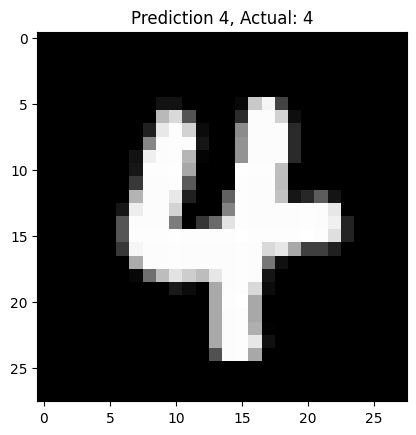

In [ ]:
# data
random_image = randint(0, 1999)
first_image = x_test[random_image]
actual_label = y_test[random_image]

# prediction
prediction = model.predict([first_image])

plt.imshow(first_image.reshape(28, 28), cmap='gray')
plt.title(f'Prediction {prediction[0]}, Actual: {actual_label}')
plt.show()